# Channel Flow

This test validates the coupling of the momentum equations and the pressure coupling.
The domain is a 2D channel with wall on the top and bottom, and a momentum inlet on
the left and a outlet (zero gradient) on the outlet.

In laminar flow the velocity profile in the channel will assume a parabolic profile.

moin


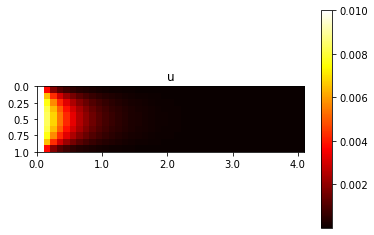

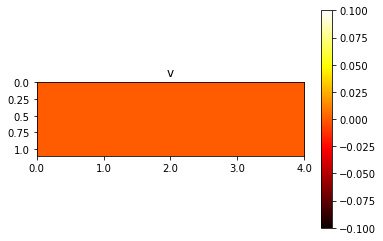

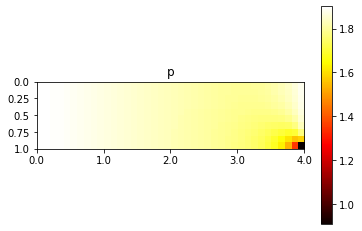

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/MultiphaseTestBench')
import Manager as mptb
from fieldAccess import *

import numpy as np
#import MeshConfig

nx = 4
ny = 1

inletVelocity = 0.01

geom = mptb.createGeometry( 'rectangle', [nx,ny] )
mesh = mptb.createMesh( geom, res=10 )

# make just a list, give a name as optional parameter to flow model
# make this a flowmodels constructor with kwargs here and then remove simulation instance
myFlowModels = {
    'u' : mptb.TransportModels.staggeredTransport_u,
    'v' : mptb.TransportModels.staggeredTransport_v,
    'p' : mptb.PressureModels.Pressure
}

passiveFields = {}

mptb.initialize(flowmodels=myFlowModels, mesh=mesh, geometry=geom, passiveFields=passiveFields )

u=mptb.getField('u')
v=mptb.getField('v')
p=mptb.getField('p')

# relates to viscosity:
u.govModel.setDiffusionCoefficient(1e-2)
v.govModel.setDiffusionCoefficient(1e-2)

u.data.fill(inletVelocity)
mptb.defineBoundaryCondition(field=u, boundaryName='top', type='fixedValue', value=0)
mptb.defineBoundaryCondition(field=u, boundaryName='bottom', type='fixedValue', value=0)
mptb.defineBoundaryCondition(field=u, boundaryName='right', type='zeroGradient')
mptb.defineBoundaryCondition(field=u, boundaryName='left', type='fixedValue', value=inletVelocity)

v.data.fill(0.0)
mptb.defineBoundaryCondition(field=v, boundaryName='top', type='fixedValue', value=0)
mptb.defineBoundaryCondition(field=v, boundaryName='bottom', type='fixedValue', value=0)
mptb.defineBoundaryCondition(field=v, boundaryName='left', type='fixedValue', value=0 )
mptb.defineBoundaryCondition(field=v, boundaryName='right', type='fixedValue', value=0)

p.data.fill(0)
mptb.defineBoundaryCondition(field=p, boundaryName='top', type='freeFlow')
mptb.defineBoundaryCondition(field=p, boundaryName='bottom', type='freeFlow')
mptb.defineBoundaryCondition(field=p, boundaryName='left', type='freeFlow' )
mptb.defineBoundaryCondition(field=p, boundaryName='right', type='constantPressure', value=0)

# underRelaxation
alphaP = 0.3
alphaUV = 0.7


# make a max function when calculating the d coefficients. some a_p values might be extremely low, such that the corresp d values become hughe

# making a more sophisticated initial guess:
# u.data[internal] = mptb.solve(u)[internal]
# v.data[internal] = mptb.solve(v)[internal]


for i in range(1):

    u.data = mptb.solve(u)
    v.data = mptb.solve(v)

    pcorr = mptb.solve(p)
    p.data += pcorr

    # u.data[internal_u] += p.govModel.d_u[internal_u] * ( pcorr[west] - pcorr[east] )
    # v.data[internal_v] += p.govModel.d_v[internal_v] * ( pcorr[south] - pcorr[north])

#
#
# # preparing the simple loop:
# for i in range(0):
#
#     uOld = u.data
#     vOld = v.data
#
#     uNew = mptb.solve(u)
#     vNew = mptb.solve(v)
#     pc = mptb.solve(p)
#
#     # correcting pressure
#     p.data += alphaP*pc
#
#     totInFlow = mptb.calcFlowRate(field=u, boundaryName='left')
#     totOutFlow = mptb.calcFlowRate(field=u, boundaryName='right')
#
#     # correcting internal:    what about the left side?
#     uNew[internal_u] += p.govModel.d_u[internal_u] * ( pc[west] - pc[east] )
#     vNew[internal_v] += p.govModel.d_v[internal_v] * ( pc[south] - pc[north] )
#     uNew[boundary_east] = uOld[boundary_nb1_east] * totInFlow/totOutFlow
#
#     u.data = alphaU*uNew + (1-alphaU)*uOld
#     #v.data = alphaV*vNew + (1-alphaV)*vOld
#
#     # correcting boundaries:  Can I not set them algorithmically? this is not nice
#     # correcting boundaries a second time:
#     totInFlow = mptb.calcFlowRate(field=u, boundaryName='left')
#     totOutFlow = mptb.calcFlowRate(field=u, boundaryName='right')
#
#     u.data[boundary_east] = u.data[boundary_nb1_east] * totInFlow/totOutFlow
# #    v.data[boundary_east] = v.data[boundary_nb1_east] * totInFlow/totOutFlow
#
#     # totInFlow = mptb.calcFlowRate(field=u, boundaryName='left')
#     # totOutFlow = mptb.calcFlowRate(field=u, boundaryName='right')
#     #
#     #print((totInFlow-totOutFlow)/totInFlow)


# totInFlow = mptb.calcFlowRate(field=u, boundaryName='left')
# totOutFlow = mptb.calcFlowRate(field=u, boundaryName='right')
#
# print("inflow:\t", totInFlow )
# print("outflow:\t", totOutFlow )

mptb.display(u,mesh,'u')
mptb.display(v,mesh,'v')
mptb.display(p,mesh,'p')

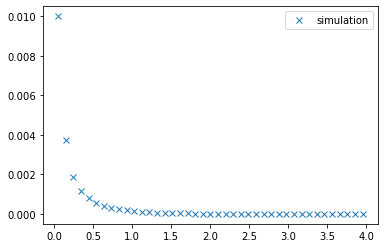

[1.00000000e-02 3.75581071e-03 1.86958181e-03 1.14221706e-03
 7.81751247e-04 5.65917372e-04 4.21079124e-04 3.17687597e-04
 2.41431053e-04 1.84198621e-04 1.40835899e-04 1.07810114e-04
 8.25841189e-05 6.32845060e-05 4.85054787e-05 3.71823287e-05
 2.85044116e-05 2.18526666e-05 1.67535330e-05 1.28444019e-05
 9.84746874e-06 7.54983390e-06 5.78830971e-06 4.43780059e-06
 3.40240640e-06 2.60860693e-06 2.00003910e-06 1.53349398e-06
 1.17584867e-06 9.01714779e-07 6.91636451e-07 5.30710105e-07
 4.07527947e-07 3.13370487e-07 2.41591072e-07 1.87149211e-07
 1.46260279e-07 1.16137749e-07 9.48111344e-08 8.10088492e-08
 7.41007556e-08]


In [2]:

# post-processing:
import numpy as np
import matplotlib.pyplot as plt

nbcellsX = mesh.cells_x
cellSpacing = mesh.uniformSpacing
LenX = geom.lenX

xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX+1)
ySim = u.data[ny//2 ,:]

# xTheo = np.linspace(0,LenX, 100)
# S = np.ones(len(xTheo))*heatSource
# yTheo = tempDistr(xTheo)

ax = plt.gca()
ax.plot(xSim, ySim, 'x', label='simulation')
#ax.plot(xTheo, yTheo, label='theoretical')

plt.legend()
plt.show()

print(ySim)


In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)